# NOTE : First feature width = 1/3rd of the window, and 1/9 of the window height.
# To find the position of the eyes using the HAAR cascade filter.

Original image


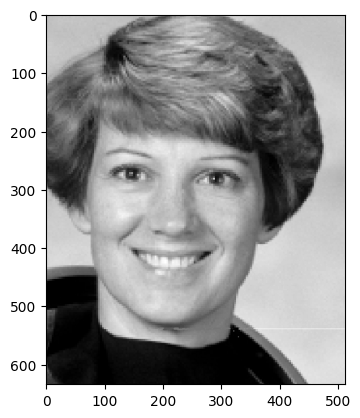

Subimage (the template)


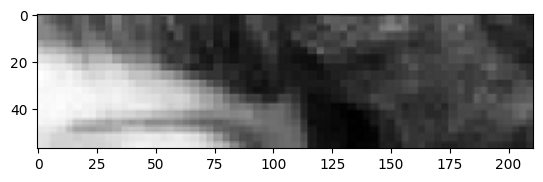

ValueError: Input images must have the same dimensions.

In [6]:
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Load the image
image = cv2.imread('face1.png')

# Conversion of image to gray scale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_width, image_height = image_gray.shape

print('Original image')
plt.imshow(image_gray, cmap='gray')
plt.show()

# Define the size of the first feature
feature_width = int(image_width / 3)
feature_height = int(image_height / 9)

print('Subimage (the template)')
subimage = image_gray[200:200+feature_height, 250:250+feature_width]
plt.imshow(subimage, cmap='gray')
plt.show()

winW = 0
found = False

fullW = image_width - feature_width
fullH = image_height - feature_height

# Load the Haar cascade for eye detection
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

while winW < fullW - feature_width and not found:
    winH = 0
    while winH < fullH - feature_height:
        window = image_gray[winW:winW+feature_height, winH:winH+feature_width]
        if ssim(subimage, window) > 0.80:
            # Find eyes within the window using Haar cascades
            eyes = eye_cascade.detectMultiScale(window, scaleFactor=1.1, minNeighbors=5)

            if len(eyes) >= 2:
                found = True
                print('Template found in the original image!')
                print("The start pixel (top left) of the source image that matches the template :: x =", winH, "and y =", winW)
                plt.imshow(image[winW:winW+feature_height, winH:winH+feature_width], cmap='gray')
                plt.show()
                
                print("The original template for reference:")
                plt.imshow(subimage, cmap='gray')
                plt.show()

                # Draw rectangles around the eyes in the window
                for (ex, ey, ew, eh) in eyes:
                    cv2.rectangle(window, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
                
                plt.imshow(window, cmap='gray')
                plt.show()
                break
        winH += 2
    winW += 2

if not found:
    print('Template not found in the original image.')
